<p align="center">
  <img src="https://i.ibb.co/rF4F9kx/logo.png">
</p>

## Extension for the previous file HR Analytics based on Logistics Regression

## !Caution this notebook as only Decision Tree part

**Correction are welcome**

In [0]:
#Import the required libaries.
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

#Misc to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
#Mount Drive
from google.colab import drive
drive.mount('/drive/')

In [0]:
#Change directory 
import os 
os.chdir('/drive/My Drive/data/HR')

In [0]:
#Read the csv using the pandas to df
df = pd.read_csv('HR_data.csv')

In [0]:
#Display first 5 rows
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [0]:
#Checking shape
df.shape

(8995, 18)

In [0]:
#Checking for nan values
df.isnull().sum()

SLNO                           0
Candidate.Ref                  0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [0]:
#Cheking dtype of each attribute
df.dtypes

SLNO                             int64
Candidate.Ref                    int64
DOJ.Extended                    object
Duration.to.accept.offer         int64
Notice.period                    int64
Offered.band                    object
Pecent.hike.expected.in.CTC    float64
Percent.hike.offered.in.CTC    float64
Percent.difference.CTC         float64
Joining.Bonus                   object
Candidate.relocate.actual       object
Gender                          object
Candidate.Source                object
Rex.in.Yrs                       int64
LOB                             object
Location                        object
Age                              int64
Status                          object
dtype: object

In [0]:
df.columns

Index(['SLNO', 'Candidate.Ref', 'DOJ.Extended', 'Duration.to.accept.offer',
       'Notice.period', 'Offered.band', 'Pecent.hike.expected.in.CTC',
       'Percent.hike.offered.in.CTC', 'Percent.difference.CTC',
       'Joining.Bonus', 'Candidate.relocate.actual', 'Gender',
       'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [0]:
#Renaming the column names
df = df.rename(columns={'Candidate.Ref':'Candidate_ref', 'DOJ.Extended':'DOJ_extended', 'Duration.to.accept.offer':'Accept_duration',
       'Notice.period':'Notice_period', 'Offered.band':'Offered_band', 'Pecent.hike.expected.in.CTC':'Percent_hike_expected',
       'Percent.hike.offered.in.CTC':'Percent_hike_offered', 'Percent.difference.CTC':'Percent_difference',
       'Joining.Bonus':'Joining_Bonus', 'Candidate.relocate.actual':'Relocated','Candidate.Source':'Source','Rex.in.Yrs':'Rex'})

In [0]:
df.columns

Index(['SLNO', 'Candidate_ref', 'DOJ_extended', 'Accept_duration',
       'Notice_period', 'Offered_band', 'Percent_hike_expected',
       'Percent_hike_offered', 'Percent_difference', 'Joining_Bonus',
       'Relocated', 'Gender', 'Source', 'Rex', 'LOB', 'Location', 'Age',
       'Status'],
      dtype='object')

In [0]:
#Rearranging Columns names
df = df[['SLNO', 'Candidate_ref', 'Accept_duration','Notice_period','Percent_hike_expected',
         'Percent_hike_offered', 'Percent_difference','Rex','Age','DOJ_extended','Offered_band'
         ,'Joining_Bonus', 'Relocated', 'Gender','Source', 'LOB', 'Location','Status']]

In [0]:
df.head()

,SLNO,Candidate_ref,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location,Status
0,1,2110407,14,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,2,2112635,18,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,3,2112838,3,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,4,2115021,26,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,5,2115125,1,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


In [0]:
#Copying the df to df1
df1 = df.copy()

In [0]:
#Dropping SLNO which is just like an Index
df1.drop('SLNO',1,inplace=True)

In [0]:
#Review the first 5 rows
df1.head()

,Candidate_ref,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location,Status
0,2110407,14,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,2112635,18,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,2112838,3,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,2115021,26,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,2115125,1,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


In [0]:
df1.columns

Index(['Candidate_ref', 'Accept_duration', 'Notice_period',
       'Percent_hike_expected', 'Percent_hike_offered', 'Percent_difference',
       'Rex', 'Age', 'DOJ_extended', 'Offered_band', 'Joining_Bonus',
       'Relocated', 'Gender', 'Source', 'LOB', 'Location', 'Status'],
      dtype='object')

In [0]:
#Dropping the "Candidate_ref" because it is just a unique id given to candidate like random genrated index ID
df1.drop('Candidate_ref',1,inplace=True)

In [0]:
#Head
df1.head()

,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location,Status
0,14,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,18,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,3,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,26,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,1,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


In [0]:
#Independented Varibales
x = df1.iloc[:,:-1]
x.head()

,Accept_duration,Notice_period,Percent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age,DOJ_extended,Offered_band,Joining_Bonus,Relocated,Gender,Source,LOB,Location
0,14,30,-20.79,13.16,42.86,7,34,Yes,E2,No,No,Female,Agency,ERS,Noida
1,18,30,50.00,320.00,180.00,8,34,No,E2,No,No,Male,Employee Referral,INFRA,Chennai
2,3,45,42.84,42.84,0.00,4,27,No,E2,No,No,Male,Agency,INFRA,Noida
3,26,30,42.84,42.84,0.00,4,34,No,E2,No,No,Male,Employee Referral,INFRA,Noida
4,1,120,42.59,42.59,0.00,6,34,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida


In [0]:
#Dependented Varibales
y = df1.iloc[:,-1]
y.head()

0    Joined
1    Joined
2    Joined
3    Joined
4    Joined
Name: Status, dtype: object

In [0]:
#Check unique attributes
df1['Status'].unique()

array(['Joined', 'Not Joined'], dtype=object)

In [0]:
#Encoding the dependented variable to binary > Joined to '0' Not Joined to '1'
y.replace(['Joined','Not Joined'],[0,1],inplace=True)

In [0]:
xd = pd.get_dummies(x,drop_first=True)

In [0]:
xd.keys()

Index(['Accept_duration', 'Notice_period', 'Percent_hike_expected',
       'Percent_hike_offered', 'Percent_difference', 'Rex', 'Age',
       'DOJ_extended_Yes', 'Offered_band_E1', 'Offered_band_E2',
       'Offered_band_E3', 'Joining_Bonus_Yes', 'Relocated_Yes', 'Gender_Male',
       'Source_Direct', 'Source_Employee Referral', 'LOB_BFSI', 'LOB_CSMP',
       'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare', 'LOB_INFRA',
       'LOB_MMS', 'Location_Bangalore', 'Location_Chennai', 'Location_Cochin',
       'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Noida', 'Location_Others',
       'Location_Pune'],
      dtype='object')

In [0]:
#Importing the imblearn
import imblearn
from imblearn.over_sampling import SMOTE #Importing SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
x_resam,y_resam = SMOTE(k_neighbors=5).fit_resample(xd,y)

In [0]:
#Random seed
np.random.seed(1001)

In [0]:
#Importing train & test split
from sklearn.model_selection import train_test_split

In [0]:
#Spliting to train,test
x_train,x_test,y_train,y_test = train_test_split(x_resam,y_resam,test_size=0.2)

In [0]:
#Checking shape of train,test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11700, 34), (2926, 34), (11700,), (2926,))

## Decision Tree

In [0]:
#Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
#tree_1 as DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(criterion='gini',max_depth=None,max_features=17)

In [0]:
#Fitting
tree_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=17, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#Checking max_depth
tree_1.tree_.max_depth

31

In [0]:
#Checking important features
imp_feature = tree_1.tree_.compute_feature_importances()

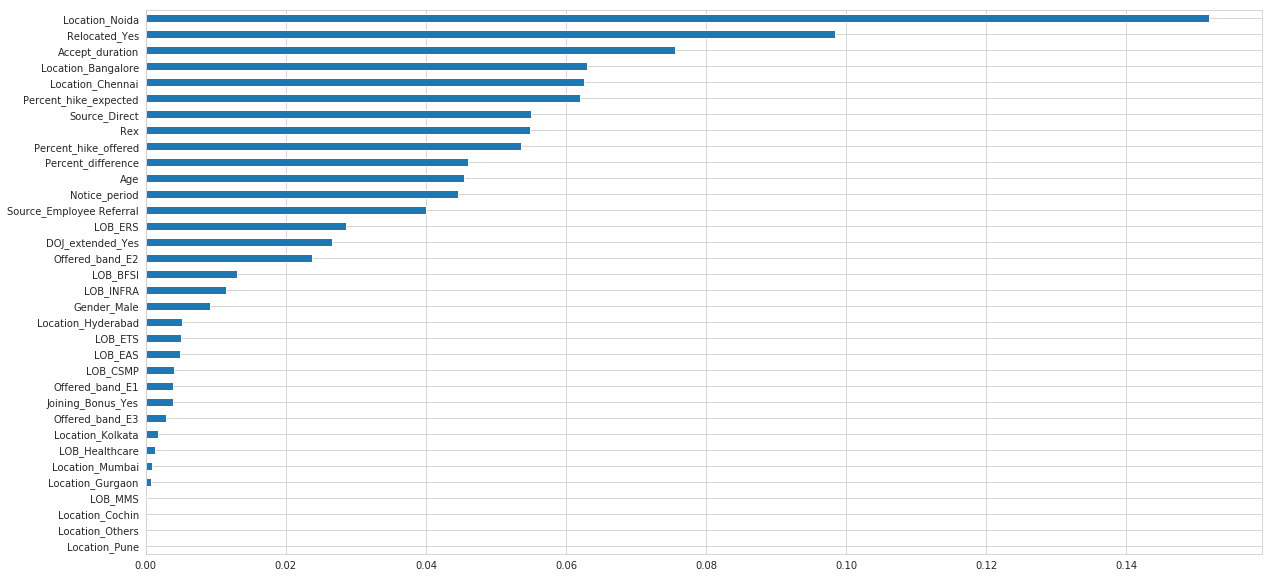

In [0]:
#Plotting important features
plt.figure(figsize=(20,10))
pd.Series(imp_feature,index=xd.columns).sort_values().plot(kind='barh')
plt.show()

In [0]:
#Checking score of train and test
tree_1.score(x_train,y_train),tree_1.score(x_test,y_test)

(0.9971794871794872, 0.82365003417635)

In [0]:
#Predicting train values
y_train_pred = tree_1.predict(x_train)

In [0]:
#Predicting test values
y_test_pred = tree_1.predict(x_test)

In [0]:
#Taking prob of positive of test
y_test_prob = tree_1.predict_proba(x_test)[:,1]

In [0]:
#Importing a custom module innomatics
import innomatics

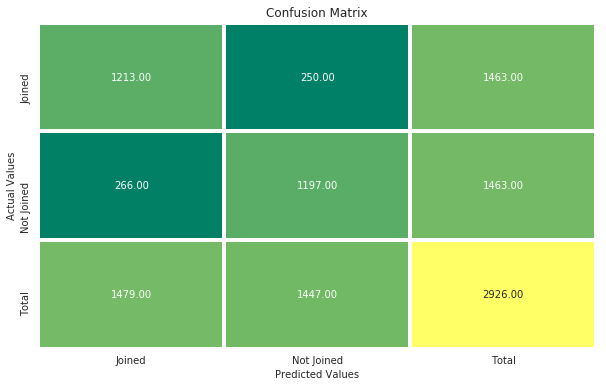

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1463
           1       0.83      0.82      0.82      1463

    accuracy                           0.82      2926
   macro avg       0.82      0.82      0.82      2926
weighted avg       0.82      0.82      0.82      2926


************************************Kappa Score************************************


Kappa Score = 0.6473000683526999

******************************Area Under Curve Score******************************


AUC Score = 0.8236500341763501
Number of probabilities to build ROC = 11


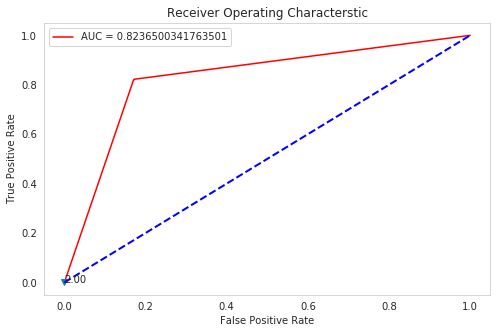

In [0]:
#classification metric
innomatics.classification_metric(y_test,y_test_pred,y_test_prob,label=['Joined','Not Joined'],n=50,verbose=True)

## Purning


In [0]:
def purning(x_train,y_train,x_test,y_test,criterion,max_depth):
  """
    A Simple purning function for plotting the scores of train and test using
    different criterion like "gini","entropy".

    !Caution import required libaries before using this function.
    
    Required: DecisionTreeClassifier
  """
  #Purning
  train_acc = []
  test_acc = []
  depth = np.arange(2,max_depth)
  for i in depth:
    model_purning = DecisionTreeClassifier(criterion=criterion,max_depth=i)
    model_purning.fit(x_train,y_train)
    train_a = model_purning.score(x_train,y_train)
    test_a = model_purning.score(x_test,y_test)
    train_acc.append(train_a)
    test_acc.append(test_a)

  plt.figure(figsize=(10,6))
  plt.plot(depth,train_acc)
  plt.plot(depth,test_acc)
  plt.xlabel('Depth')
  plt.ylabel('Score')
  plt.legend(['train','test'])
  plt.show()

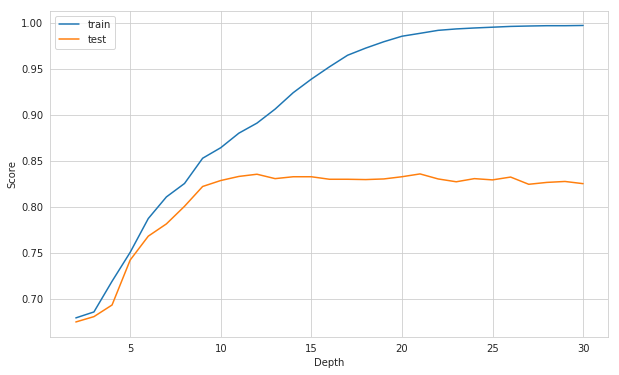

In [0]:
#purning with gini criterion
purning(x_train,y_train,x_test,y_test,'gini',31)

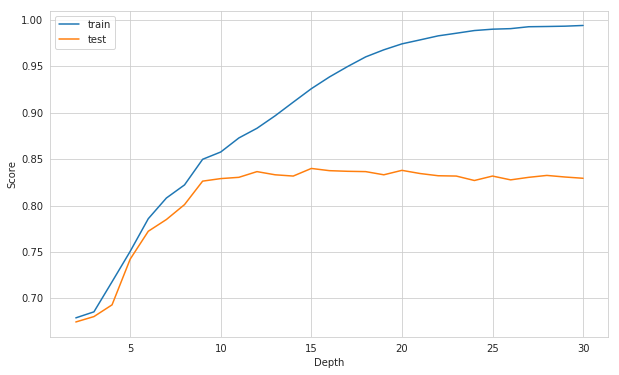

In [0]:
#purning with entropy criterion
purning(x_train,y_train,x_test,y_test,'entropy',31)

**From above plots selecting max depth as the 12**

In [0]:
#Now selecting the model with above value 12 and max_feature of 17(from previous notebook)
model_pur = DecisionTreeClassifier(criterion='gini',max_depth=11,max_features=17)
model_pur.fit(x_train,y_train)
yp_test_pred = model_pur.predict(x_test)
yp_test_prob = model_pur.predict_proba(x_test)[:,1]

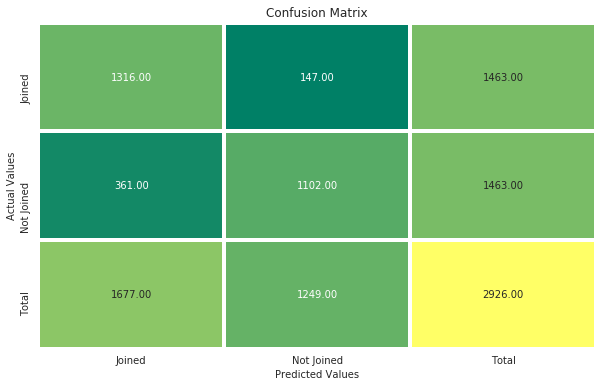

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1463
           1       0.88      0.75      0.81      1463

    accuracy                           0.83      2926
   macro avg       0.83      0.83      0.83      2926
weighted avg       0.83      0.83      0.83      2926


************************************Kappa Score************************************


Kappa Score = 0.6527682843472318

******************************Area Under Curve Score******************************


AUC Score = 0.8263841421736159
Number of probabilities to build ROC = 77


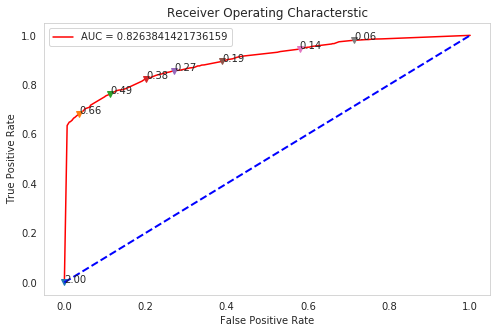

In [0]:
innomatics.classification_metric(y_test,yp_test_pred,yp_test_prob,
                                 label=['Joined','Not Joined'],n=10,verbose=True)

In [0]:
#Assuming Same criteria for DecisionTree also
from sklearn.metrics import confusion_matrix, classification_report
def FP(x_train,y_train,cri,ratio=3):
  """
    A Function for filtering the giving criteria which is ratio between
    the FP's to FN's should be 3 times.

    cri: can be criterion for classsifer like 'gini' are 'entropy'.

    ratio: ratio between the FP's to FN (default its 3).

    You can select the max_depth and max_features which is index.

    Note: No Combinations are applied in this function. max_depth = max_features.

  """
  FP = []
  FN = []
  max_depth = np.arange(2,27)
  for m in max_depth:
    model_tune = DecisionTreeClassifier(criterion=cri,max_depth=m,max_features=m,random_state=0)
    model_tune.fit(x_train,y_train)
    y_pred = model_tune.predict(x_train)
    tn, fp, fn, tp = confusion_matrix(y_train,y_pred).ravel()
    FP.append(fp)
    FN.append(fn)
  MAX = pd.DataFrame(index=max_depth)
  MAX['FP'] = FP
  MAX['FN'] = FN
  MAX['Ratio'] = np.array(FP)/np.array(FN)
  return MAX[MAX["Ratio"]>ratio]


In [0]:
#Ratio for gini
FP(x_train,y_train,'gini')

,FP,FN,Ratio
4,2661,781,3.407170
5,2556,799,3.198999


In [0]:
#Ration for entropy
FP(x_train,y_train,'entropy')

,FP,FN,Ratio
4,2661,781,3.407170
5,2556,843,3.032028


We can observe the near the max_depth of 5 the FP's to FN's ratio is quite ok its is near to 3 with entropy criterion.

In [0]:
#Model with max_depth 5 and max_feature 5
model_para = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features=5,random_state=0)
model_para.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

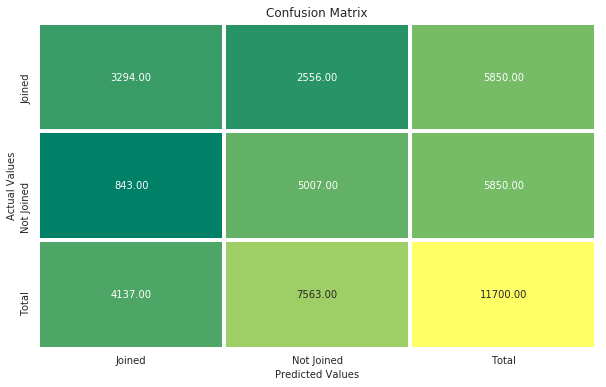

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.80      0.56      0.66      5850
           1       0.66      0.86      0.75      5850

    accuracy                           0.71     11700
   macro avg       0.73      0.71      0.70     11700
weighted avg       0.73      0.71      0.70     11700


************************************Kappa Score************************************


Kappa Score = 0.418974358974359

******************************Area Under Curve Score******************************


AUC Score = 0.7094871794871795
Number of probabilities to build ROC = 21


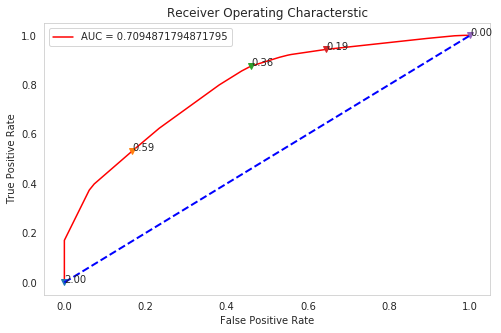

In [0]:
innomatics.classification_metric(y_train,model_para.predict(x_train),model_para.predict_proba(x_train)[:,1]
                                 ,label=['Joined','Not Joined'],n=5,verbose=True)

In [0]:
#Extracting important features
imp_features = model_para.tree_.compute_feature_importances()

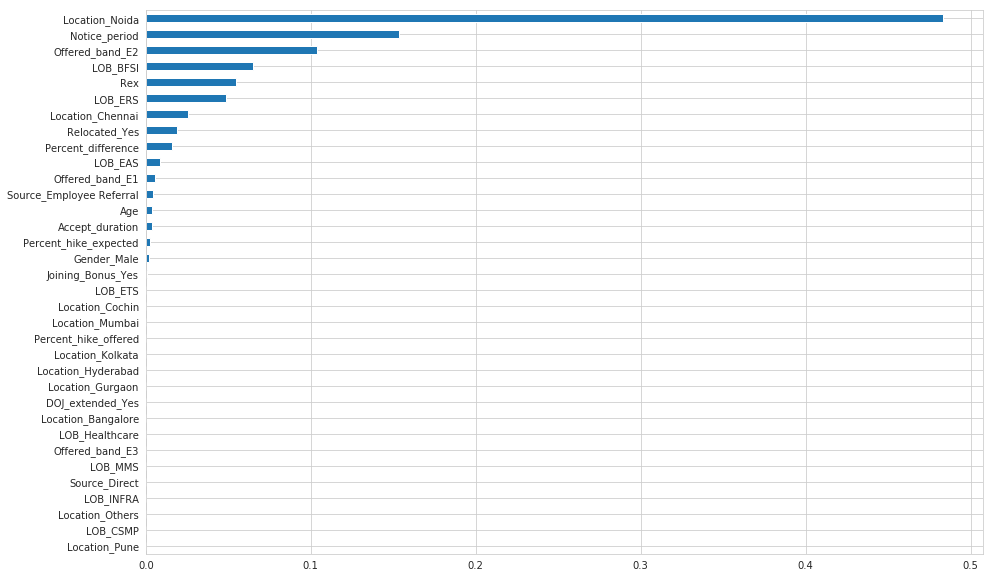

In [0]:
#Plotting
plt.figure(figsize=(15,10))
pd.Series(imp_features,index=xd.columns).sort_values().plot(kind='barh')
plt.show()

In [0]:
#Getting tree
from sklearn.tree import export_graphviz
import pydotplus
export_graphviz(model_para,out_file='final.odt',
                feature_names=xd.columns,filled=True)
graph = pydotplus.graph_from_dot_file('final.odt')
graph.write_pdf('final.pdf')
graph.write_jpg('final.jpg')

True

In [0]:
#Importing mpimg for images
import matplotlib.image as mpimg

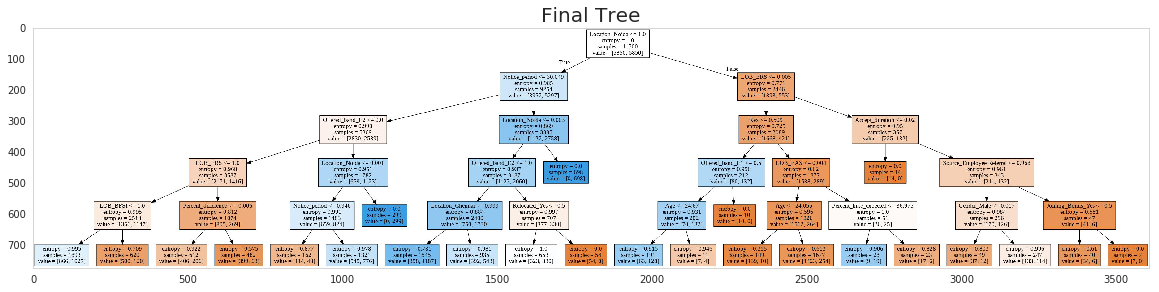

In [0]:
#Read and displaying the saved tree
tree = mpimg.imread('final.jpg')
plt.figure(figsize=(20,20))
plt.title('Final Tree',fontsize=20)
plt.imshow(tree)
plt.grid()